# Imports

In [13]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import glob
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## init

In [ ]:
plt.close('all')
pd.options.display.max_rows = 999

In [ ]:
# Get all Tweets file paths
raw_data_path = r'data/raw/*Tweets*.csv'
csv_files = glob.glob(raw_data_path)
csv_files

# At glace

In [ ]:
df_at_glace = pd.read_csv(csv_files[0], encoding='utf-8')
df_at_glace.head()

# Read Files

In [ ]:
use_columns = ['created_at','text', 'retweet_count', 'country_code', 'followers_count', 'lang', 'screen_name']
data_frames = []
for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8', usecols=use_columns)
    data_frames.append(df)
df = pd.concat(data_frames)
del data_frames
df.head()

# EDA

## MX Twitts

In [ ]:
mx_twitts = df.query('country_code == "MX"')

## ES twitts

In [ ]:
es_twitts = df.query('lang == "es"')

In [ ]:
es_twitts.count()

## Total vs Es vs Mx

In [ ]:
es_twitts.count()

In [ ]:
df.count()

In [ ]:
mx_twitts.count()

## Chart Total vs ES vs MX

In [ ]:
total_twitts = df.count()['text']
total_es = es_twitts.count()['text']
total_mx = mx_twitts.count()['text']

twitts_total_and_es = {'labels': ['total', 'es', 'mx'], 'values': [total_twitts, total_es, total_mx]} 
d = pd.DataFrame(data=twitts_total_and_es)

In [ ]:
d.plot.bar(x='labels', y='values', rot=0)

## Es twitts acounting

In [ ]:
screen_name_total = es_twitts.groupby('screen_name')['text'].nunique().reset_index()

ten = screen_name_total.sort_values(by='text', ascending=False).head(10)
ten

## es twitts accounting Chart

In [ ]:
ten.plot.bar(x='screen_name', y='text', rot=30)

## Histogram twitts ES Chart

In [ ]:
line_df = es_twitts.groupby('created_at')['text'].nunique().reset_index()

line_df.plot(figsize=(17,8), x='created_at', y='text', rot=45)

## Country code

In [ ]:
cc = es_twitts.groupby('country_code')['text'].nunique().reset_index()
cc.sort_values(by='text', ascending=False, inplace=True)
cc.head(15)

## Country code chart

In [ ]:
cc.head(15).plot.bar(x='country_code', y='text', rot=0)

## Exploring Word Density from MX Twetts

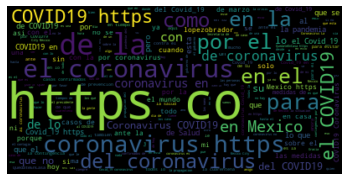

In [14]:
text = (" ").join(mx_twitts.text.tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
## Export csv twitts in Spanish
es_twitts.to_csv(r'data\clean\es_twitts.csv', index = None, header=True)